In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
runcycle=1000
runduration=0.001
timestep=runduration/runcycle;


In [70]:
# input parameters

L= 30#in uH
C= 5000#in uF
n= 200 # winding count
Rcoil= .13 # in ohms
Rpara= 0 
R=Rcoil+Rpara

a=R/(2*L*10**-6)
w=1/np.sqrt(L*10**-6*C*10**-6)

V0=20 # in Volts
I0=0

B1=I0
B2=V0/(L*10**-6)/w

C1=V0
C2=0

coil_length=20 #mm
coil_radius=5 #mm
caliber = 25 #mm^2(5mm by 5mm)
load_length=3 #mm
load_mass=15 # grams
u0=4*np.pi*10**-7 #vacuum permeability
u=6.3*10**-3 #iron permeability (H/m)
saturation=0.75 #Teslas
D=1 #mm starting offset
# setup time series
Icyc=np.zeros(runcycle)
Idis=np.zeros(runcycle)
Iflywheel=np.zeros(runcycle)
Vcyc=np.zeros(runcycle)

t=np.linspace(0,runduration,runcycle)
# raw current response
Icyc = B1*np.exp(-a*t)*np.cos(w*t)+B2*np.exp(-a*t)*np.sin(w*t)
#diode clamped state
Idis = max(Icyc)*np.exp((-R*t)/(L*10**-6))

Max current 95.09923728908429 A
Time to peak:0.338ms


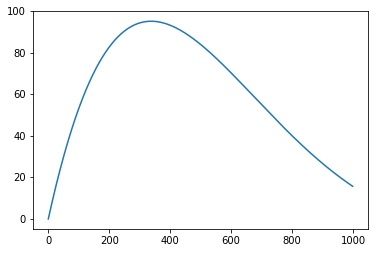

In [71]:
plt.plot(Icyc)
print("Max current " + str(max(Icyc))+" A")
insersionPt=0
captured=0
for i in range(runcycle-1):
    if (Icyc[i]>Icyc[i+1] and captured ==0):
        insersionPt=i
        captured=1
print("Time to peak:"+str((insersionPt/runcycle)*runduration*1000) + "ms")

In [6]:
# generate diode flywheel response

Iflywheel=Icyc
Iflywheel[insersionPt:runcycle]=Idis[0:runcycle-insersionPt]

In [59]:
#calculate saturation flux & force
maxforce = saturation**2*caliber*10**-6/2/u0


In [60]:
maxforce

5.595290968074445

In [8]:
#generate force, acceleration, veolocity, displacement time series
force=np.zeros(runcycle);
force_raw=np.zeros(runcycle);
dis=np.zeros(runcycle);
v=np.zeros(runcycle);
a=np.zeros(runcycle);

In [9]:
#simulate force transient
iterr = iter(range(runcycle))
next(iterr) # skip first term
for i in iterr:
    if dis[i-1]*1000<D:
        force[i]=(n*Iflywheel[i])**2*u0*caliber*10**-6/2/((D*10**-3-dis[i-1]))**2
        print('before %.4f %.4f %d',dis[i-1],force[i],i)
    elif (D-dis[i-1]*1000 <= 0 and dis[i-1]*1000-D <= coil_length ): # if in coil
        force[i]=(.5-((dis[i-1]*10**3-D)/coil_length))*2* (u*n*Iflywheel[i])**2*caliber*10**-6/2/u0
        print('within %.4f %.4f %d',dis[i-1],.5-((dis[i-1]*10**3-D)/coil_length),i)
    elif dis[i-1]*1000-D-coil_length>0:
        force[i]=-(n*Iflywheel[i])**2*u0*caliber*10**-6/2/((dis[i-1]-D*10**-3-coil_length*10**-3))**2
        print('beyond %.4f %.4f %d',dis[i-1],force[i],i)
    
    force_raw[i]=force[i];
    if force[i]>0:
        force[i] = min(force[i],maxforce);
    else:
        force[i] = -min(-force[i],maxforce);
    
    a[i]=force[i]/(load_mass*10**-3);
    v[i]=v[i-1]+a[i]*timestep;
    dis[i]=dis[i-1]+v[i]*timestep;


before %.4f %.4f %d 0.0 11.918781800760856 1
before %.4f %.4f %d 3.7301939787162975e-06 25.15536002880926 2
before %.4f %.4f %d 1.1190581936148893e-05 29.966768335409576 3
before %.4f %.4f %d 2.2381163872297786e-05 8.51280308154883 4
before %.4f %.4f %d 3.7301939787162974e-05 2.4376880316207585 5
before %.4f %.4f %d 5.384784105644201e-05 0.7007820334784769 6
before %.4f %.4f %d 7.086093034804002e-05 0.20178556426795843 7
before %.4f %.4f %d 8.800854334915e-05 0.05815895679540749 8
before %.4f %.4f %d 0.00010519492898812359 0.01677597940615726 9
before %.4f %.4f %d 0.00012239249861336796 0.004842735104071815 10
before %.4f %.4f %d 0.0001395932967286817 0.0013990408862267934 11
before %.4f %.4f %d 0.00015679502753791958 0.00040449976072190474 12
before %.4f %.4f %d 0.00017399702801366464 0.00011704907254889839 13
before %.4f %.4f %d 0.00019119910652212472 3.3899599067431114e-05 14
before %.4f %.4f %d 0.0002084012076303175 9.826846456251859e-06 15
before %.4f %.4f %d 0.0002256033152897412

within %.4f %.4f %d 0.01261112275816153 -0.08055613790807648 736
within %.4f %.4f %d 0.012628324868500377 -0.08141624342501885 737
within %.4f %.4f %d 0.012645526978839224 -0.08227634894196112 738
within %.4f %.4f %d 0.01266272908917807 -0.0831364544589035 739
within %.4f %.4f %d 0.012679931199516917 -0.08399655997584587 740
within %.4f %.4f %d 0.012697133309855764 -0.08485666549278814 741
within %.4f %.4f %d 0.01271433542019461 -0.08571677100973052 742
within %.4f %.4f %d 0.012731537530533457 -0.08657687652667279 743
within %.4f %.4f %d 0.012748739640872303 -0.08743698204361516 744
within %.4f %.4f %d 0.01276594175121115 -0.08829708756055754 745
within %.4f %.4f %d 0.012783143861549997 -0.08915719307749981 746
within %.4f %.4f %d 0.012800345971888843 -0.09001729859444219 747
within %.4f %.4f %d 0.01281754808222769 -0.09087740411138445 748
within %.4f %.4f %d 0.012834750192566536 -0.09173750962832683 749
within %.4f %.4f %d 0.012851952302905383 -0.09259761514526921 750
within %.4f %.4f

In [10]:
#calculate efficiency
outenergy=0.5*(load_mass*10**-3)*v[-1]**2;
inenergy=0.5*(C*10**-6)*V0**2;
effi=100*outenergy/inenergy
print(effi)

0.3035001026767956


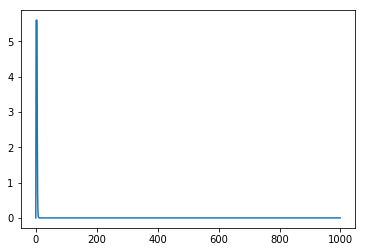

In [11]:
plt.plot(force)

In [12]:
force

array([0.00000000e+000, 5.59529097e+000, 2.58168421e-001, 9.25155255e-003,
       3.31546900e-004, 1.18819877e-005, 4.25840462e-007, 1.52622495e-008,
       5.47021105e-010, 1.96066610e-011, 7.02776663e-013, 2.51909922e-014,
       9.02999652e-016, 3.23701249e-017, 1.16042151e-018, 4.16008199e-020,
       1.49142993e-021, 5.34710594e-023, 1.91712229e-024, 6.87378691e-026,
       2.46466366e-027, 8.83760808e-029, 3.16903784e-030, 1.13641211e-031,
       4.07530543e-033, 1.46150561e-034, 5.24151657e-036, 1.87987830e-037,
       6.74246872e-039, 2.41838102e-040, 8.67455566e-042, 3.11162049e-043,
       1.11620260e-044, 4.00420786e-046, 1.43650627e-047, 5.15366187e-049,
       1.84902149e-050, 6.63415784e-052, 2.38038719e-053, 8.54137009e-055,
       3.06496677e-056, 1.09987281e-057, 3.94709699e-059, 1.41655011e-060,
       5.08399449e-062, 1.82472477e-063, 6.54951300e-065, 2.35093262e-066,
       8.43900166e-068, 3.02943661e-069, 1.08755885e-070, 3.90448675e-072,
       1.40183092e-073, 5